In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
from pandas.api.types import CategoricalDtype

# warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

# Hide warning temporarily
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("data/flights_sample_2m.csv")

In [3]:
df.isna().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     51430
DEP_DELAY                    51449
TAXI_OUT                     52281
WHEELS_OFF                   52281
WHEELS_ON                    53091
TAXI_IN                      53091
CRS_ARR_TIME                     0
ARR_TIME                     53091
ARR_DELAY                    57231
CANCELLED                        0
CANCELLATION_CODE          1947478
DIVERTED                         0
CRS_ELAPSED_TIME                17
ELAPSED_TIME                 57231
AIR_TIME                     57231
DISTANCE                         0
DELAY_DUE_CARRIER          1643780
DELAY_DUE_WEATHER   

In [4]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])
df["YEAR"] = df["FL_DATE"].dt.year
df["MONTH"] = df["FL_DATE"].dt.month

In [5]:
dow_category = CategoricalDtype(categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday",
                                            "Saturday", "Sunday"], ordered=True)

# 1. Phân tích mô tả (Descriptive Analysis)
## 1.1 Tổng quan

### Số chuyến bay mỗi năm (2019-2023)

In [6]:
df_flights = df.copy()

In [7]:
flights_yearly = df_flights.groupby("YEAR")["FL_DATE"].count().reset_index(name="Total_Flights")
flights_yearly

,YEAR,Total_Flights
0,2019,505345
1,2020,318768
2,2021,407824
3,2022,457760
4,2023,310303


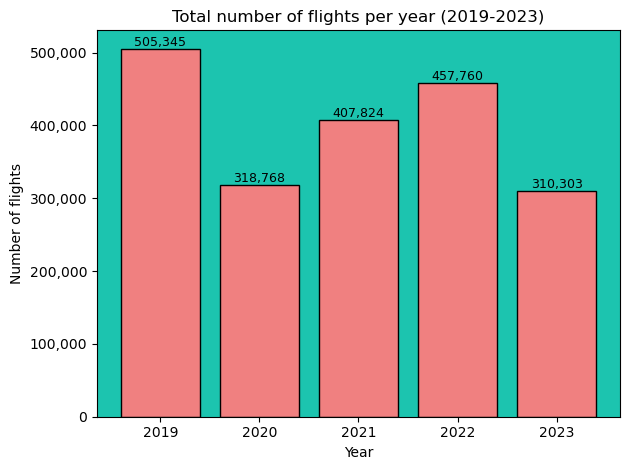

In [8]:
plt.bar(flights_yearly["YEAR"], flights_yearly["Total_Flights"], 
        color = "lightcoral", edgecolor="black")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

plt.title("Total number of flights per year (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Number of flights")

# Add numeric labels to columns
for i, val in enumerate(flights_yearly["Total_Flights"]):
    plt.text(flights_yearly["YEAR"].iloc[i], val, f"{val:,}", 
             ha="center", va="bottom", fontsize=9)

# Setting the background color of the plot
ax = plt.gca()
ax.set_facecolor("#1CC4AF")

#plt.grid()
plt.tight_layout()
plt.show()

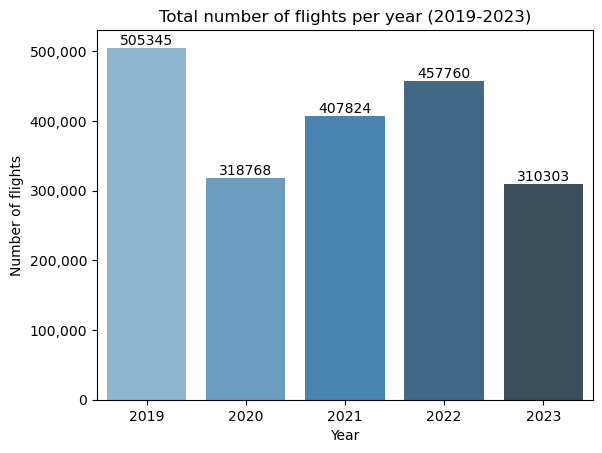

In [9]:
ax = sns.barplot(data = flights_yearly, 
                 x = "YEAR", y = "Total_Flights", 
                 palette="Blues_d")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))


plt.title("Total number of flights per year (2019-2023)")
plt.xlabel("Year")
plt.ylabel("Number of flights")

# Add labels by iterating through the bar patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,  # X-coordinate for text
            p.get_height(),                  # Y-coordinate for text (top of the bar)
            '%.0f' % p.get_height(),         # The label text (formatted height)
            fontsize=10,
            color='black',
            ha='center',                     # Horizontal alignment
            va='bottom')                     # Vertical alignment    
#plt.grid()
#plt.tight_layout()
plt.show()

### Mỗi tháng có bao nhiêu chuyến bay?

In [10]:
flights_monthly = df_flights.groupby(["YEAR","MONTH"])["FL_DATE"].count().reset_index(name="Total_Flights")
flights_monthly

,YEAR,MONTH,Total_Flights
0,2019,1,39568
1,2019,2,35912
2,2019,3,43208
3,2019,4,41136
4,2019,5,43293
5,2019,6,43584
6,2019,7,44850
7,2019,8,45015
8,2019,9,41281
9,2019,10,43438


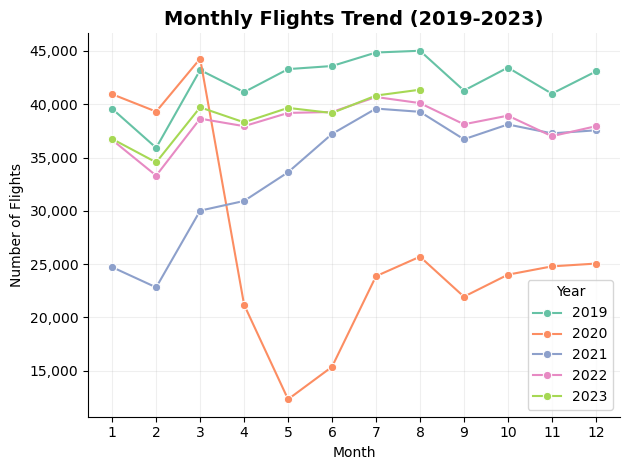

In [11]:
sns.lineplot(data = flights_monthly,
             x = "MONTH", y = "Total_Flights",
             hue = "YEAR", marker = "o", palette="Set2")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

plt.title("Monthly Flights Trend (2019-2023)", fontsize=14, weight="bold")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(alpha = 0.2)
sns.despine()
plt.tight_layout()
plt.show()

### Hãng hàng không nào có nhiều chuyến bay nhất mỗi năm?

In [12]:
# Tổng số chuyến bay theo năm và hãng
flights_airline_yearly = (
    df_flights.groupby(["YEAR", "AIRLINE"])["FL_DATE"]
    .count()
    .reset_index(name="Total_Flights")
)

# Tổng toàn ngành mỗi năm
flights_industry_total = (
    flights_airline_yearly.groupby("YEAR")["Total_Flights"]
    .sum()
    .reset_index(name="Industry_Total")
)

# Merge vào bảng hãng
flights_airline_vs_industry = flights_airline_yearly.merge(flights_industry_total, on="YEAR")

In [13]:
# Tính % thay đổi so với năm trước (tốc độ phục hồi)
flights_airline_vs_industry["Growth_Rate"] = (
    flights_airline_vs_industry.groupby("AIRLINE")["Total_Flights"]
    .pct_change() * 100
)

flights_industry_total["Industry_Growth"] = (
    flights_industry_total["Industry_Total"].pct_change() * 100
)

In [14]:
# Lấy hãng top (ví dụ: top năm 2019)
airline_top = (
    flights_airline_vs_industry[flights_airline_vs_industry["YEAR"] == 2019]
    .sort_values("Total_Flights", ascending=False)
    .iloc[0]["AIRLINE"]
)

# So sánh tốc độ phục hồi của hãng top
compare = flights_airline_vs_industry[flights_airline_vs_industry["AIRLINE"] == airline_top][["YEAR", "Growth_Rate"]].merge(flights_industry_total[["YEAR", "Industry_Growth"]], 
                                                                                                          on="YEAR"
)
print(f"Top airline: {airline_top}")
print(compare)

Top airline: Southwest Airlines Co.
   YEAR  Growth_Rate  Industry_Growth
0  2019          NaN              NaN
1  2020   -30.085404       -36.920718
2  2021    11.239175        27.937560
3  2022    22.425528        12.244498
4  2023   -27.414635       -32.212732


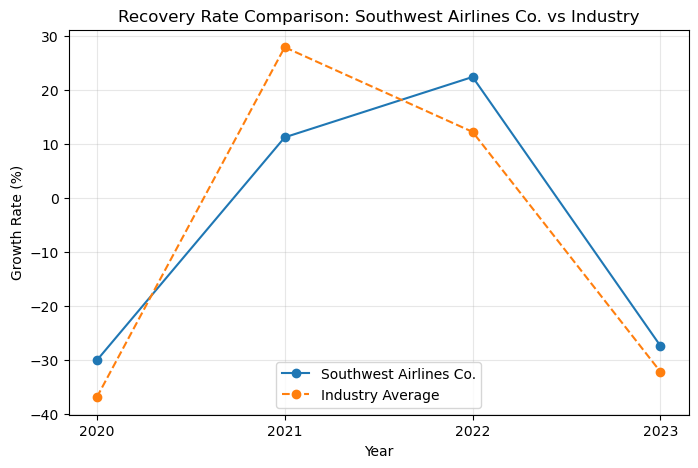

In [15]:
compare["YEAR"] = compare["YEAR"].astype(str)

plt.figure(figsize=(8,5))
plt.plot(compare["YEAR"], compare["Growth_Rate"], marker='o', label=f"{airline_top}")
plt.plot(compare["YEAR"], compare["Industry_Growth"], marker='o', linestyle='--', label="Industry Average")
plt.title(f"Recovery Rate Comparison: {airline_top} vs Industry")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Sân bay nào là điểm khởi hành / điểm đến phổ biến nhất?

In [16]:
flights_origin_yearly = df_flights.groupby(["YEAR","ORIGIN","ORIGIN_CITY"])["FL_DATE"].count().reset_index(name="Total_Flights")

In [17]:
origin_top = (
    flights_origin_yearly.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Total_Flights"))
)
origin_top

,YEAR,ORIGIN,ORIGIN_CITY,Total_Flights
21,2019,ATL,"Atlanta, GA",27064
382,2020,ATL,"Atlanta, GA",17460
749,2021,ATL,"Atlanta, GA",21454
1119,2022,ATL,"Atlanta, GA",21624
1488,2023,ATL,"Atlanta, GA",15125


In [18]:
origin_least = (
    flights_origin_yearly.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Total_Flights"))
)
origin_least

,YEAR,ORIGIN,ORIGIN_CITY,Total_Flights
13,2019,AKN,"King Salmon, AK",5
525,2020,HYA,"Hyannis, MA",1
764,2021,BIH,"Bishop, CA",1
1137,2022,BKG,"Branson, MO",1
1542,2023,COD,"Cody, WY",1


In [19]:
flights_dest_yearly = df_flights.groupby(["YEAR","DEST","DEST_CITY"])["FL_DATE"].count().reset_index(name="Total_Flights")

In [20]:
dest_top = (
    flights_dest_yearly.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Total_Flights"))
)
dest_top

,YEAR,DEST,DEST_CITY,Total_Flights
21,2019,ATL,"Atlanta, GA",26891
382,2020,ATL,"Atlanta, GA",17342
750,2021,ATL,"Atlanta, GA",21293
1120,2022,ATL,"Atlanta, GA",21594
1487,2023,ATL,"Atlanta, GA",15276


In [21]:
dest_least = (
    flights_dest_yearly.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Total_Flights"))
)
dest_least

,YEAR,DEST,DEST_CITY,Total_Flights
13,2019,AKN,"King Salmon, AK",2
715,2020,UIN,"Quincy, IL",1
765,2021,BIH,"Bishop, CA",2
1343,2022,OGD,"Ogden, UT",2
1541,2023,COD,"Cody, WY",1


## 1.2 Delay tổng quát
### Tỉ lệ chuyến bay bị delay (>15 phút) là bao nhiêu?

In [22]:
df_flights_delay = df.copy()

In [23]:
# tỉ lệ delay theo năm - tháng
delay_rate_yearly = (df_flights_delay.groupby(["YEAR","MONTH"])["ARR_DELAY"]
        .apply(lambda x: (x > 15).mean() * 100).round(1)
        .reset_index(name="Delay_Rate")
)

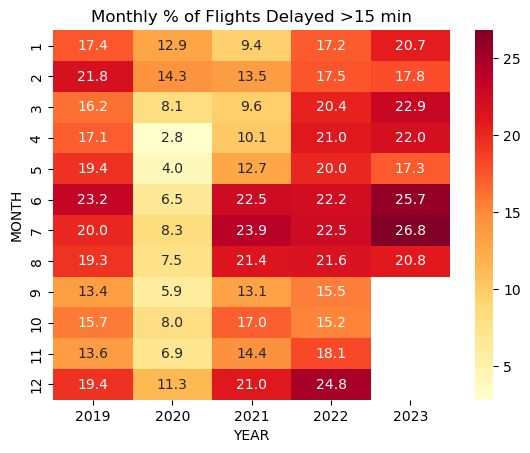

In [24]:
monthly_pivot = delay_rate_yearly.pivot(index="MONTH", 
                                          columns="YEAR", 
                                          values="Delay_Rate")
sns.heatmap(monthly_pivot, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Monthly % of Flights Delayed >15 min")
plt.show()

### Thời gian delay trung bình là bao nhiêu phút?

In [25]:
# 15 phút mới record dữ liệu nguyên nhân
flights_delayed = df_flights_delay[df_flights_delay["ARR_DELAY"] >15]

In [26]:
delay_avg_yearly = flights_delayed.groupby(["YEAR"])["ARR_DELAY"].mean().reset_index(name = "Avg_Arrival_Delay").round(1)
delay_avg_yearly

,YEAR,Avg_Arrival_Delay
0,2019,70.7
1,2020,64.4
2,2021,68.0
3,2022,69.1
4,2023,72.6


### Phân phối độ trễ (histogram): delay thường rơi vào khoảng bao nhiêu phút?

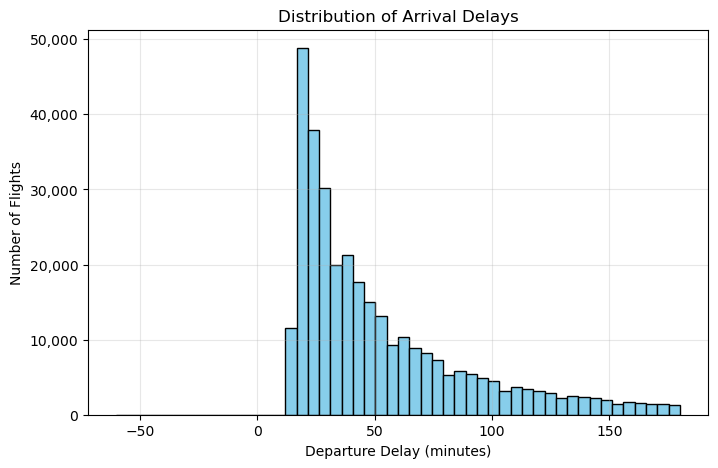

In [27]:
plt.figure(figsize=(8,5))
plt.hist(flights_delayed["ARR_DELAY"], bins=50, range=(-60, 180), 
         color="skyblue", edgecolor="black")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

plt.title("Distribution of Arrival Delays")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Number of Flights")
plt.grid(alpha=0.3)
plt.show()

### Tỉ lệ chuyến bay bị hủy (CANCELLED = 1)?

In [28]:
df_flights_cancel = df.copy()

In [29]:
flights_cancelled = df_flights_cancel[df_flights_cancel["CANCELLED"] == 1]

In [30]:
flights_cancel_yearly = flights_cancelled.groupby("YEAR")["AIRLINE"].count().reset_index(name = "Total_Cancelled_Flights")
flights_cancel_yearly

,YEAR,Total_Cancelled_Flights
0,2019,9067
1,2020,19238
2,2021,7074
3,2022,12133
4,2023,5010


In [31]:
# Tỉ lệ chuyến bay bị hủy hàng năm
flights_cancel_yearly = flights_cancelled.groupby("YEAR")["AIRLINE"].count().reset_index(name = "Total_Cancelled_Flights")

df_cancel_merge = flights_cancel_yearly.merge(flights_yearly, on = "YEAR")
df_cancel_merge["Cancelled_Rate"] = (df_cancel_merge["Total_Cancelled_Flights"] / df_cancel_merge["Total_Flights"] * 100).round(1)
df_cancel_merge

,YEAR,Total_Cancelled_Flights,Total_Flights,Cancelled_Rate
0,2019,9067,505345,1.8
1,2020,19238,318768,6.0
2,2021,7074,407824,1.7
3,2022,12133,457760,2.7
4,2023,5010,310303,1.6


### Tỉ lệ chuyến bị diverted (DIVERTED = 1)?

In [32]:
df_flights_divert = df.copy()

In [33]:
flights_diverted = df_flights_divert[df_flights_divert["DIVERTED"] == 1]

In [34]:
# Tỉ lệ chuyến bay bị chuyến hướng hàng năm
divert_rate_yearly = flights_diverted.groupby("YEAR")["AIRLINE"].count().reset_index(name = "Total_Diverted_Flights")
divert_airline_vs_total = divert_rate_yearly.merge(flights_yearly, on = "YEAR")
divert_airline_vs_total["Diverted_Rate"] = (divert_airline_vs_total["Total_Diverted_Flights"] / divert_airline_vs_total["Total_Flights"] * 100).round(1)
divert_airline_vs_total

,YEAR,Total_Diverted_Flights,Total_Flights,Diverted_Rate
0,2019,1262,505345,0.2
1,2020,548,318768,0.2
2,2021,991,407824,0.2
3,2022,1073,457760,0.2
4,2023,835,310303,0.3


In [35]:
# Tỉ lệ chuyến bay bị chuyển hướng theo tháng hàng năm
divert_rate_monthly = flights_diverted.groupby(["YEAR","MONTH"])["AIRLINE"].count().reset_index(name = "Total_Diverted_Flights")
divert_airline_vs_total = divert_rate_monthly.merge(flights_monthly, 
                                                 on = ["YEAR", "MONTH"], 
                                                 how="inner")
divert_airline_vs_total["Diverted_Rate"] = (divert_airline_vs_total["Total_Diverted_Flights"] / divert_airline_vs_total["Total_Flights"] * 100).round(1)
divert_airline_vs_total

,YEAR,MONTH,Total_Diverted_Flights,Total_Flights,Diverted_Rate
0,2019,1,88,39568,0.2
1,2019,2,96,35912,0.3
2,2019,3,62,43208,0.1
3,2019,4,113,41136,0.3
4,2019,5,137,43293,0.3
5,2019,6,171,43584,0.4
6,2019,7,157,44850,0.4
7,2019,8,126,45015,0.3
8,2019,9,86,41281,0.2
9,2019,10,79,43438,0.2


## 1.3 Theo thời gian
### Tỉ lệ delay theo tháng (hoặc quý) thay đổi ra sao?

In [36]:
flights_delayed.loc[:,"QUARTER"] = ((flights_delayed["MONTH"]-1)//3)+1

In [37]:
# tỉ lệ delay theo tháng
delay_rate_monthly = flights_delayed.groupby(["YEAR","MONTH"])["AIRLINE"].count().reset_index(name = "Total_Delayed_Flights")
delay_rate_monthly

,YEAR,MONTH,Total_Delayed_Flights
0,2019,1,6902
1,2019,2,7818
2,2019,3,7007
3,2019,4,7039
4,2019,5,8379
5,2019,6,10129
6,2019,7,8977
7,2019,8,8670
8,2019,9,5512
9,2019,10,6830


In [38]:
# Tỉ lệ chuyến bay bị hủy theo quý hàng năm
delay_rate_quarterly = flights_delayed.groupby(["YEAR","QUARTER"])["AIRLINE"].count().reset_index(name = "Total_Delayed_Flights")
delay_rate_quarterly

,YEAR,QUARTER,Total_Delayed_Flights
0,2019,1,21727
1,2019,2,25547
2,2019,3,23159
3,2019,4,20758
4,2020,1,14471
5,2020,2,2070
6,2020,3,5181
7,2020,4,6457
8,2021,1,8278
9,2021,2,15781


### Tỉ lệ delay trung bình theo ngày trong tuần (Monday–Sunday).

In [39]:
flights_delayed.loc[:,"DAY_OF_WEEK"] = flights_delayed["FL_DATE"].dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                                     4: 'Friday', 5: 'Saturday', 6: 'Sunday'}).astype(dow_category)

In [40]:
delay_rate_weekday = flights_delayed.groupby(["YEAR","DAY_OF_WEEK"])["DEP_DELAY"].mean().reset_index(name = "Avg_Delayed_Flights").round(1)
delay_rate_weekday

,YEAR,DAY_OF_WEEK,Avg_Delayed_Flights
0,2019,Monday,69.1
1,2019,Tuesday,63.5
2,2019,Wednesday,62.9
3,2019,Thursday,65.9
4,2019,Friday,64.5
5,2019,Saturday,70.1
6,2019,Sunday,68.7
7,2020,Monday,57.3
8,2020,Tuesday,58.0
9,2020,Wednesday,58.2


### Delay trung bình theo giờ khởi hành (CRS_DEP_TIME) — giờ cao điểm có nhiều delay hơn không?

In [41]:
flights_delayed.loc[:,"DEP_HOUR"] = (flights_delayed["CRS_DEP_TIME"] // 100).astype(int)

delay_avg_hourly = (
    flights_delayed.groupby("DEP_HOUR")["DEP_DELAY"]
    .mean().reset_index(name = "Avg_Departure_Delay").round(1)
)
delay_avg_hourly

,DEP_HOUR,Avg_Departure_Delay
0,0,68.5
1,1,86.7
2,2,72.6
3,3,60.4
4,4,54.4
5,5,82.3
6,6,73.4
7,7,64.2
8,8,58.0
9,9,57.6


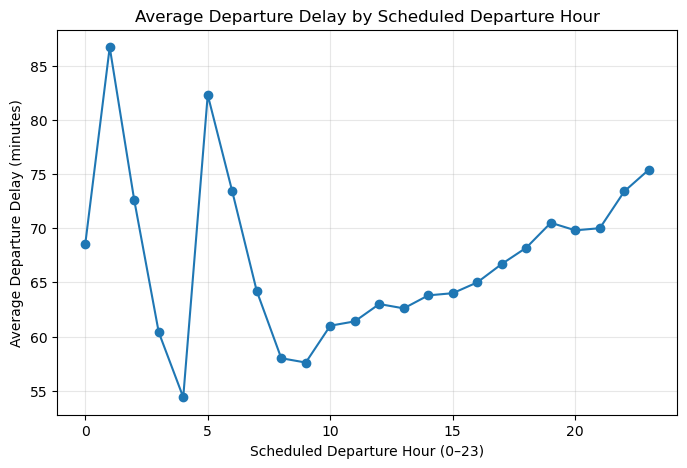

In [42]:
plt.figure(figsize=(8,5))
plt.plot(delay_avg_hourly["DEP_HOUR"], 
         delay_avg_hourly["Avg_Departure_Delay"], 
         marker="o")
plt.title("Average Departure Delay by Scheduled Departure Hour")
plt.xlabel("Scheduled Departure Hour (0–23)")
plt.ylabel("Average Departure Delay (minutes)")
plt.grid(True, alpha=0.3)
plt.show()

### Có xu hướng delay tăng vào mùa đông hoặc mùa mưa không?

In [43]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

flights_delayed["SEASON"] = flights_delayed["MONTH"].apply(get_season)

In [44]:
delay_avg_seasonal = flights_delayed.groupby(["YEAR","SEASON"])["DEP_DELAY"].mean().reset_index(name = "Avg_Delayed_Flights").round(1)
delay_avg_seasonal

,YEAR,SEASON,Avg_Delayed_Flights
0,2019,Fall,61.4
1,2019,Spring,66.9
2,2019,Summer,70.2
3,2019,Winter,64.8
4,2020,Fall,55.7
5,2020,Spring,59.5
6,2020,Summer,54.6
7,2020,Winter,61.6
8,2021,Fall,61.7
9,2021,Spring,64.8


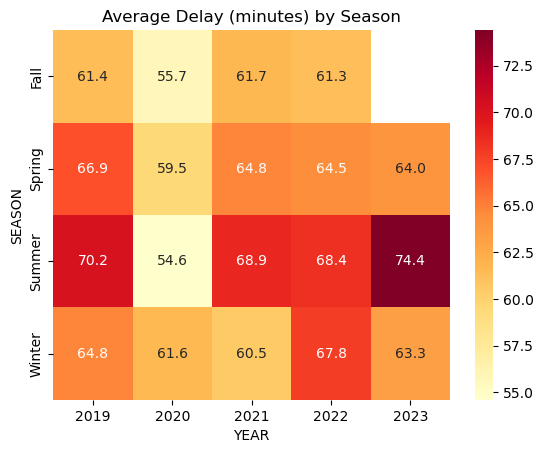

In [45]:
season_pivot = delay_avg_seasonal.pivot(index="SEASON", 
                                          columns="YEAR", 
                                          values="Avg_Delayed_Flights")
sns.heatmap(season_pivot, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Average Delay (minutes) by Season")
plt.show()

## 1.4 Theo hãng và sân bay
### Hãng hàng không nào có delay trung bình cao nhất / thấp nhất?

In [46]:
delay_airline = (
    flights_delayed.groupby(["YEAR", "AIRLINE"])["ARR_DELAY"]
        .mean().reset_index(name = "Delay_Rate").round(1)
        .sort_values("Delay_Rate", ascending=False)
)

airline_delay_top = (
    delay_airline.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Delay_Rate"))
)

airline_delay_least = (
    delay_airline.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Delay_Rate"))
)

In [47]:
airline_delay_top

,YEAR,AIRLINE,Delay_Rate
6,2019,ExpressJet Airlines LLC d/b/a aha!,88.7
30,2020,SkyWest Airlines Inc.,79.8
47,2021,SkyWest Airlines Inc.,86.5
61,2022,Mesa Airlines Inc.,91.3
70,2023,American Airlines Inc.,91.3


In [48]:
airline_delay_least

,YEAR,AIRLINE,Delay_Rate
8,2019,Hawaiian Airlines Inc.,42.5
31,2020,Southwest Airlines Co.,45.9
41,2021,Hawaiian Airlines Inc.,47.3
58,2022,Hawaiian Airlines Inc.,46.9
75,2023,Hawaiian Airlines Inc.,51.8


### Hãng nào có tỉ lệ hủy cao nhất?

In [49]:
# Tỉ lệ chuyến bay bị hủy hàng năm
cancel_rate_yearly = flights_cancelled.groupby("YEAR")["AIRLINE"].count().reset_index(name = "Total_Cancelled_Flights")
df_cancel_merge = cancel_rate_yearly.merge(flights_yearly, on = "YEAR")
df_cancel_merge["Cancelled_Rate"] = (df_cancel_merge["Total_Cancelled_Flights"] / df_cancel_merge["Total_Flights"] * 100).round(1)
df_cancel_merge

,YEAR,Total_Cancelled_Flights,Total_Flights,Cancelled_Rate
0,2019,9067,505345,1.8
1,2020,19238,318768,6.0
2,2021,7074,407824,1.7
3,2022,12133,457760,2.7
4,2023,5010,310303,1.6


In [50]:
cancel_rate_airline = (
    flights_cancelled.groupby(["YEAR", "AIRLINE"])["FL_DATE"].count()
        .reset_index(name = "Cancelled_Flights")
        #.sort_values("Cancelled_Rate", ascending=True)
)

cancel_airline_vs_total = cancel_rate_airline.merge(flights_airline_yearly, 
                                                 on = ["YEAR", "AIRLINE"], 
                                                 how="inner")

cancel_airline_vs_total["Cancelled_Rate"] = cancel_airline_vs_total["Cancelled_Flights"] / cancel_airline_vs_total["Total_Flights"] * 100
cancel_airline_vs_total = cancel_airline_vs_total.reset_index(drop=True)

cancel_airline_vs_total = cancel_airline_vs_total.drop(columns=["level_0", "index"], errors="ignore")
cancel_airline_vs_total

,YEAR,AIRLINE,Cancelled_Flights,Total_Flights,Cancelled_Rate
0,2019,Alaska Airlines Inc.,220,17914,1.228090
1,2019,Allegiant Air,37,7124,0.519371
2,2019,American Airlines Inc.,1330,64590,2.059142
3,2019,Delta Air Lines Inc.,123,67743,0.181569
4,2019,Endeavor Air Inc.,304,17502,1.736944
...,...,...,...,...,...
78,2023,Republic Airline,442,13972,3.163470
79,2023,SkyWest Airlines Inc.,485,30288,1.601294
80,2023,Southwest Airlines Co.,829,64495,1.285371
81,2023,Spirit Air Lines,230,11930,1.927913


In [51]:
airline_cancel_top = (
    cancel_airline_vs_total.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Cancelled_Rate"))
)
airline_cancel_top

,YEAR,AIRLINE,Cancelled_Flights,Total_Flights,Cancelled_Rate
6,2019,ExpressJet Airlines LLC d/b/a aha!,413,9074,4.551466
18,2020,Allegiant Air,1008,6654,15.148783
35,2021,Allegiant Air,263,7975,3.297806
63,2022,Republic Airline,947,21334,4.438924
78,2023,Republic Airline,442,13972,3.163470


In [52]:
airline_cancel_least = (
    cancel_airline_vs_total.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Cancelled_Rate"))
)
airline_cancel_least

,YEAR,AIRLINE,Cancelled_Flights,Total_Flights,Cancelled_Rate
8,2019,Hawaiian Airlines Inc.,8,5736,0.139470
32,2020,Spirit Air Lines,205,8997,2.278537
41,2021,Hawaiian Airlines Inc.,17,4078,0.416871
58,2022,Hawaiian Airlines Inc.,41,5070,0.808679
69,2023,Allegiant Air,43,5523,0.778562


### Sân bay nào có delay lớn nhất (tính theo ORIGIN)?

In [53]:
delay_origin = (
    flights_delayed.groupby(["YEAR", "ORIGIN","ORIGIN_CITY"])["ARR_DELAY"]
        .mean().reset_index(name = "Delay_Rate").round(1)
        .sort_values("Delay_Rate", ascending=False)
)

origin_delay_top = (
    delay_origin.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Delay_Rate"))
)

origin_delay_least = (
    delay_origin.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Delay_Rate"))
)

In [54]:
origin_delay_top

,YEAR,ORIGIN,ORIGIN_CITY,Delay_Rate
177,2019,JMS,"Jamestown, ND",303.3
711,2020,XWA,"Williston, ND",365.0
1037,2021,SLN,"Salina, KS",689.3
1208,2022,FOD,"Fort Dodge, IA",661.4
1742,2023,SLN,"Salina, KS",576.0


In [55]:
origin_delay_least

,YEAR,ORIGIN,ORIGIN_CITY,Delay_Rate
51,2019,BRW,"Barrow, AK",23.0
680,2020,STC,"St. Cloud, MN",16.5
877,2021,HYA,"Hyannis, MA",16.0
1288,2022,LWS,"Lewiston, ID",18.6
1694,2023,PPG,"Pago Pago, TT",16.0


### Sân bay nào thường xuyên gặp TAXI_OUT hoặc TAXI_IN dài nhất?

In [56]:
taxiout_origin = (
    df_flights.groupby(["YEAR", "ORIGIN","ORIGIN_CITY"])["TAXI_OUT"]
        .mean().reset_index(name = "Avg_Out_Time").round(1)
        .sort_values("Avg_Out_Time", ascending=False)
)

origin_taxiout_top = (
    taxiout_origin.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Avg_Out_Time"))
)

origin_taxiout_least = (
    taxiout_origin.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Avg_Out_Time"))
)

In [57]:
origin_taxiout_top

,YEAR,ORIGIN,ORIGIN_CITY,Avg_Out_Time
197,2019,LGA,"New York, NY",27.0
512,2020,HDN,"Hayden, CO",22.8
827,2021,DIK,"Dickinson, ND",29.5
1195,2022,DIK,"Dickinson, ND",28.3
1574,2023,ERI,"Erie, PA",28.7


In [58]:
origin_taxiout_least

,YEAR,ORIGIN,ORIGIN_CITY,Avg_Out_Time
321,2019,SMX,"Santa Maria, CA",6.0
525,2020,HYA,"Hyannis, MA",4.0
986,2021,OWB,"Owensboro, KY",5.3
1465,2022,YKM,"Yakima, WA",6.2
1710,2023,OWB,"Owensboro, KY",7.0


In [59]:
taxiin_origin = (
    df_flights.groupby(["YEAR", "ORIGIN","ORIGIN_CITY"])["TAXI_IN"]
        .mean().reset_index(name = "Avg_In_Time").round(1)
        .sort_values("Avg_In_Time", ascending=False)
)

origin_taxiin_top = (
    taxiin_origin.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Avg_In_Time"))
)

origin_taxiin_least = (
    taxiin_origin.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Avg_In_Time"))
)

In [60]:
origin_taxiin_top

,YEAR,ORIGIN,ORIGIN_CITY,Avg_In_Time
33,2019,BFM,"Mobile, AL",25.9
453,2020,DBQ,"Dubuque, IA",14.5
858,2021,FOD,"Fort Dodge, IA",20.1
1269,2022,ILG,"Wilmington, DE",22.6
1540,2023,CMX,"Hancock/Houghton, MI",16.8


In [61]:
origin_taxiin_least

,YEAR,ORIGIN,ORIGIN_CITY,Avg_In_Time
324,2019,SPN,"Saipan, TT",3.0
525,2020,HYA,"Hyannis, MA",2.0
979,2021,OME,"Nome, AK",3.7
1377,2022,PSG,"Petersburg, AK",3.9
1607,2023,GST,"Gustavus, AK",3.4


# 2. PHÂN TÍCH NGUYÊN NHÂN (DIAGNOSTIC ANALYSIS)
## 2.1 Nguyên nhân delay

### Trong các loại delay, loại nào chiếm nhiều thời gian nhất (carrier / weather / NAS / late aircraft / security)?

ARR_DELAY / DEP_DELAY >=15 mới record nguyên nhân

In [62]:
# Tự động tìm các cột có tên bắt đầu bằng 'DELAY_DUE_'
reason_cols = [col for col in df_flights.columns 
               if col.startswith("DELAY_DUE_")]

# Lấy delay và xem khi nào bắt đầu có dữ liệu nguyên nhân
df_flights["HAS_REASON"] = df_flights[reason_cols].notna().any(axis=1)

# Tìm ngưỡng delay nhỏ nhất mà từ đó trở lên có nguyên nhân
threshold = df_flights.loc[df_flights["HAS_REASON"], "ARR_DELAY"].min()
print(f"Ngưỡng nhỏ nhất xuất hiện nguyên nhân delay: {threshold} phút")

Ngưỡng nhỏ nhất xuất hiện nguyên nhân delay: 15.0 phút


In [63]:
# tính tổng các DELAY_DUE_ qua các năm
delay_reason_total_yearly = df_flights.groupby("YEAR")[reason_cols].sum().reset_index()
delay_reason_total_yearly

,YEAR,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019,1989178.0,354689.0,1550193.0,7889.0,2592701.0
1,2020,770575.0,126095.0,401927.0,5427.0,530895.0
2,2021,1870536.0,309902.0,749475.0,13059.0,1615627.0
3,2022,2492378.0,354192.0,1061055.0,12665.0,2368843.0
4,2023,1758913.0,268083.0,912951.0,10244.0,2000025.0


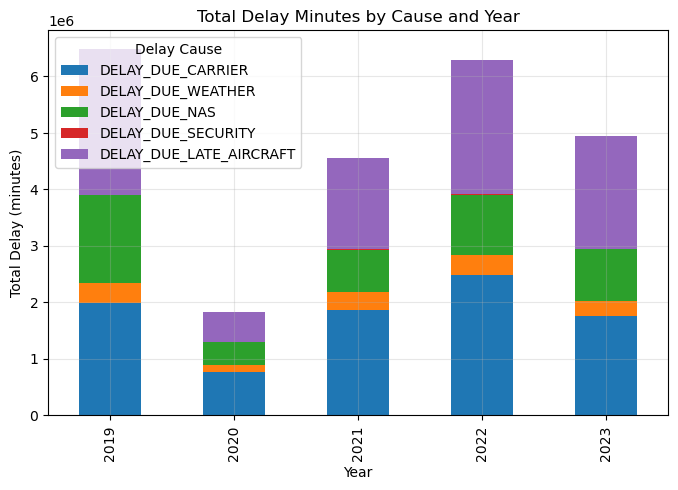

In [64]:
delay_reason_total_yearly.set_index("YEAR")[reason_cols].plot(
    kind="bar", stacked=True, figsize=(8,5)
)
plt.title("Total Delay Minutes by Cause and Year")
plt.ylabel("Total Delay (minutes)")
plt.xlabel("Year")
plt.legend(title="Delay Cause")
plt.grid(alpha=0.3)
plt.show()

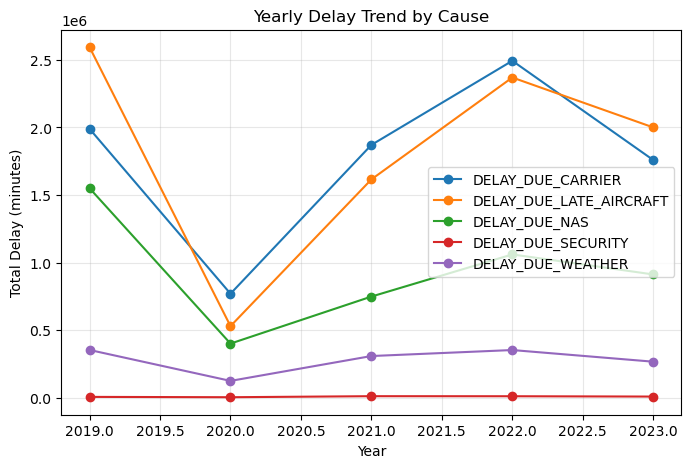

In [65]:
delay_by_year_melted = delay_reason_total_yearly.melt(
    id_vars="YEAR", var_name="Cause", value_name="Total_Delay"
)

plt.figure(figsize=(8,5))
for cause, group in delay_by_year_melted.groupby("Cause"):
    plt.plot(group["YEAR"], group["Total_Delay"], marker='o', label=cause)

plt.title("Yearly Delay Trend by Cause")
plt.xlabel("Year")
plt.ylabel("Total Delay (minutes)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Delay do “Late Aircraft” có mối liên hệ mạnh với ARR_DELAY tổng không?

In [66]:
# Kiểm tra tương quan
# Python không fill NA, R có fill NA → kết quả lệch.
late_aircraft_df = flights_delayed[["ARR_DELAY", "DELAY_DUE_LATE_AIRCRAFT"]].dropna()
late_aircraft_corr = late_aircraft_df.corr().iloc[0,1]
late_aircraft_corr

np.float64(0.5003588297421518)

Nhận xét:
- Late Aircraft Delay tăng → Arrival Delay cũng tăng
- corr ~ 0.50035 -> trung bính - khá
- R-squared ≈ correlation^2 = 0.504^2 ≈ 0.254
- => Khoảng 25% biến động Arrival Delay đến từ Late Aircraft Delay.

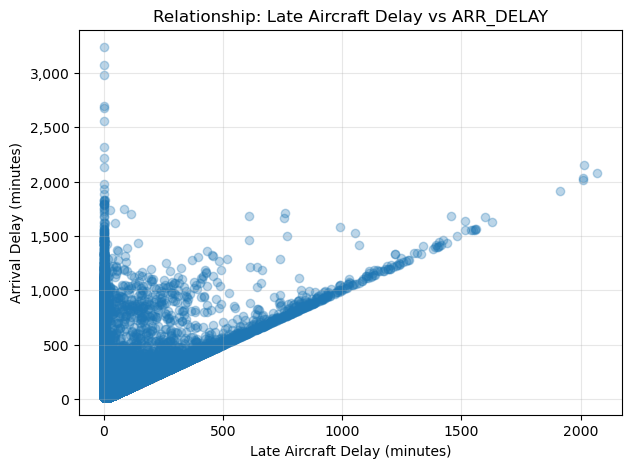

In [67]:
plt.figure(figsize=(7,5))
plt.scatter(late_aircraft_df["DELAY_DUE_LATE_AIRCRAFT"], 
            late_aircraft_df["ARR_DELAY"], alpha=0.3)
plt.xlabel("Late Aircraft Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Relationship: Late Aircraft Delay vs ARR_DELAY")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

plt.grid(alpha=0.3)
plt.show()

### Tỉ lệ delay do thời tiết khác nhau giữa các tháng như thế nào?

In [68]:
# tổng số phút delay do weather theo year + month
weather_delay_monthly = flights_delayed.groupby(["YEAR","MONTH"])["DELAY_DUE_WEATHER"].sum().reset_index(name = "Weather_Delay (minutes)")

# Tính tổng ARR_DELAY theo YEAR + MONTH
arr_delay_monthly = flights_delayed.groupby(["YEAR","MONTH"])["ARR_DELAY"].sum().reset_index(name = "Arr_Delay (minutes)")

# Merge 2 bảng
weather_rate_monthly = weather_delay_monthly.merge(arr_delay_monthly, on=["YEAR","MONTH"])

# Tỉ lệ delay do weather (%)
weather_rate_monthly["Weather_Delay_Rate"] = (weather_rate_monthly["Weather_Delay (minutes)"] / weather_rate_monthly["Arr_Delay (minutes)"] * 100).round(1)
weather_rate_monthly

,YEAR,MONTH,Weather_Delay (minutes),Arr_Delay (minutes),Weather_Delay_Rate
0,2019,1,27003.0,479590.0,5.6
1,2019,2,38391.0,547247.0,7.0
2,2019,3,20180.0,466245.0,4.3
3,2019,4,27966.0,509825.0,5.5
4,2019,5,41842.0,604308.0,6.9
5,2019,6,40288.0,739691.0,5.4
6,2019,7,51926.0,704295.0,7.4
7,2019,8,30064.0,622991.0,4.8
8,2019,9,18877.0,378445.0,5.0
9,2019,10,16492.0,440693.0,3.7


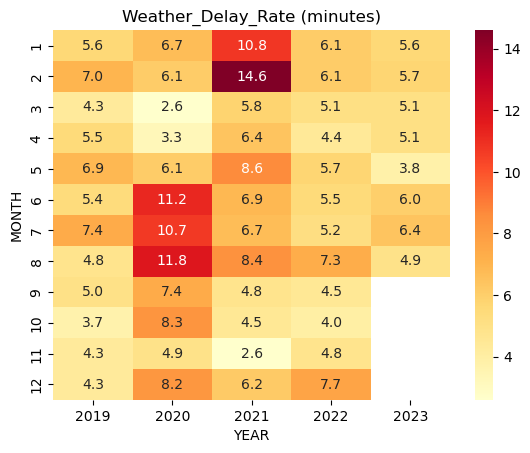

In [69]:
season_pivot = weather_rate_monthly.pivot(index="MONTH", 
                                          columns="YEAR", 
                                          values="Weather_Delay_Rate")
sns.heatmap(season_pivot, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Weather_Delay_Rate (minutes)")
plt.show()

In [70]:
# Kiểm tra tương quan
# Python không fill NA, R có fill NA → kết quả lệch.
due_weather_df = flights_delayed[["ARR_DELAY", "DELAY_DUE_WEATHER"]].dropna()
due_weather_corr = due_weather_df.corr().iloc[0,1]
due_weather_corr

np.float64(0.2872365248410074)

Nhận xét:
- DELAY_DUE_WEATHER tăng → Arrival Delay cũng tăng
- corr ~ 0.2872 -> thấp
- R-squared ≈ correlation^2 = 0.08248384 * 100 = 8.2%
- => Khoảng 8.2% biến động Arrival Delay đến từ Weather

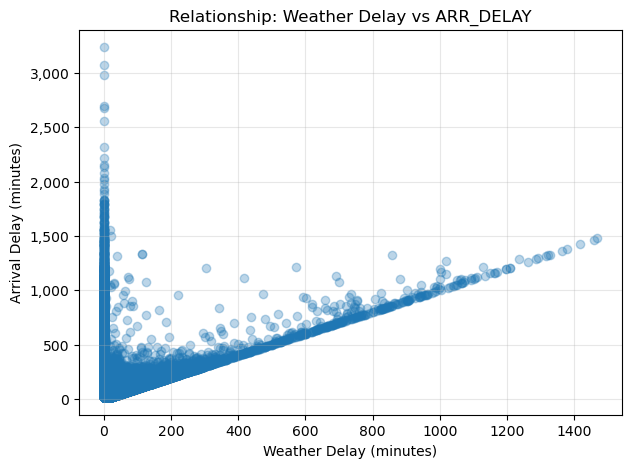

In [71]:
plt.figure(figsize=(7,5))
plt.scatter(due_weather_df["DELAY_DUE_WEATHER"], 
            due_weather_df["ARR_DELAY"], alpha=0.3)
plt.xlabel("Weather Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Relationship: Weather Delay vs ARR_DELAY")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

plt.grid(alpha=0.3)
plt.show()

### Hãng nào thường bị ảnh hưởng nhiều bởi thời tiết nhất?

In [72]:
# Đánh dấu chuyến bị ảnh hưởng bởi weather
flights_delayed["Weather_Delay_Flag"] = (flights_delayed["DELAY_DUE_WEATHER"] >0).astype(int)

weather_delay_flights = flights_delayed.groupby(["YEAR", "AIRLINE"])["Weather_Delay_Flag"].sum().reset_index(name = "Flights_Delayed_Weather")

# các hãng bị ảnh hưởng nhiều nhất
weather_delay_flights_top = (
    weather_delay_flights.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Flights_Delayed_Weather"))
)

# các hãng bị ảnh hưởng it nhất
weather_delay_flights_least = (
    weather_delay_flights.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nsmallest(1, "Flights_Delayed_Weather"))
)

In [73]:
weather_delay_flights_top

,YEAR,AIRLINE,Flights_Delayed_Weather
2,2019,American Airlines Inc.,853
30,2020,SkyWest Airlines Inc.,426
47,2021,SkyWest Airlines Inc.,816
53,2022,American Airlines Inc.,961
70,2023,American Airlines Inc.,831


In [74]:
weather_delay_flights_least

,YEAR,AIRLINE,Flights_Delayed_Weather
8,2019,Hawaiian Airlines Inc.,42
25,2020,Hawaiian Airlines Inc.,9
41,2021,Hawaiian Airlines Inc.,14
59,2022,Horizon Air,56
75,2023,Hawaiian Airlines Inc.,36


### Có mối tương quan giữa DISTANCE và AIR_TIME không?

In [75]:
distance_air_df = df_flights[["DISTANCE", "AIR_TIME"]].dropna()
distance_air_corr = distance_air_df.corr().iloc[0, 1]
distance_air_corr

np.float64(0.9838620125436421)

Nhận xét:

- DISTANCE tăng → AIR_TIME cũng tăng
- corr ~ 0.983 -> cao -> khoảng cách càng xa, thời gian bay càng nhiều
- R-squared ≈ correlation^2 = 0.966298 * 100 = 96%
=> Khoảng 96% biến động AIR_TIME đến từ DISTANCE

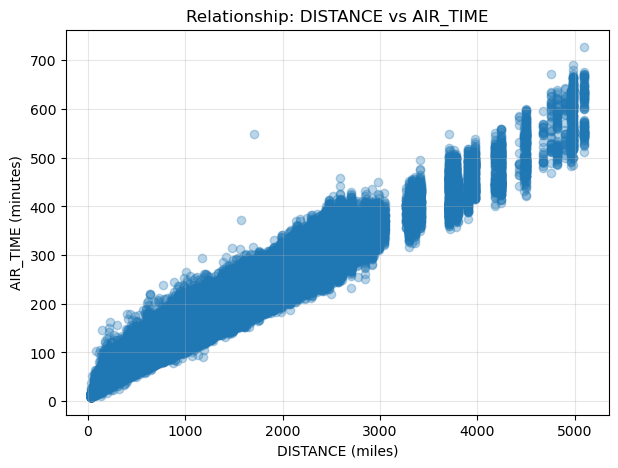

In [76]:
plt.figure(figsize=(7,5))
plt.scatter(distance_air_df["DISTANCE"], 
            distance_air_df["AIR_TIME"], alpha=0.3)
plt.xlabel("DISTANCE (miles)")
plt.ylabel("AIR_TIME (minutes)")
plt.title("Relationship: DISTANCE vs AIR_TIME")

# define a custom formatter function
def thousands_formatter(x, p):
    return format(int(x), ',')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

plt.grid(alpha=0.3)
plt.show()

### Delay do “Carrier” có xu hướng xảy ra ở sân bay nào nhiều nhất?

In [77]:
# Đánh dấu sân bay bị ảnh hưởng bởi carrier
flights_delayed["Carrier_Delay_Flag"] = (flights_delayed["DELAY_DUE_CARRIER"] >0).astype(int)

carrier_delay_flights = flights_delayed.groupby(["YEAR", "ORIGIN","ORIGIN_CITY"])["Carrier_Delay_Flag"].sum().reset_index(name = "Flights_Delayed_Carrier")

# các hãng bị ảnh hưởng nhiều nhất
carrier_delay_flights_top = (
    carrier_delay_flights.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Flights_Delayed_Carrier"))
)

In [78]:
carrier_delay_flights_top

,YEAR,ORIGIN,ORIGIN_CITY,Flights_Delayed_Carrier
93,2019,DFW,"Dallas/Fort Worth, TX",2799
451,2020,DFW,"Dallas/Fort Worth, TX",1074
808,2021,DEN,"Denver, CO",2732
1173,2022,DEN,"Denver, CO",3322
1529,2023,DEN,"Denver, CO",2475


### TAXI_OUT dài có liên quan đến ARR_DELAY cao hơn không?

In [79]:
taxiout_arrdelay_df = df_flights[["TAXI_OUT", "ARR_DELAY"]].dropna()
taxiout_arrdelay_corr = taxiout_arrdelay_df.corr().iloc[0, 1]
taxiout_arrdelay_corr

np.float64(0.19516096301920144)

Nhận xét:

- TAXI_OUT tăng → ARR_DELAY cũng tăng nhưng ko nhiều
- corr ~ 0.195 -> thấp 
- R-squared ≈ correlation^2 = 0.038025 * 100 = 3.8%
=> Khoảng 3.8% biến động ARR_DELAY đến từ TAXI_OUT

### Thời gian bay (AIR_TIME) dài hơn có làm tăng khả năng delay (ARR_DELAY) không?

In [80]:
airtime_arrdelay_df = df_flights[["AIR_TIME", "ARR_DELAY"]].dropna()
airtime_arrdelay_corr = airtime_arrdelay_df.corr().iloc[0, 1]
airtime_arrdelay_corr

np.float64(0.017230764990109858)

Nhận xét:

- AIR_TIME tăng → ARR_DELAY tăng rất ít, hầu như ko
- corr ~ 0.01723 -> rất thấp 
- R-squared ≈ correlation^2 = 0.002968 * 100 = 0.297%
=> Khoảng 0.297% biến động ARR_DELAY đến từ AIR_TIME

### Các chuyến đêm muộn hoặc sáng sớm có ít delay hơn không?

In [81]:
flights_delayed["HOUR"] = (flights_delayed["CRS_DEP_TIME"]//100).astype(int)

# Tạo nhóm thời gian: pd.cut()
# Không dùng 0–4 mà là -1–4 vì pd.cut() loại trừ giá trị đầu (left-open),
# Dùng -1 để chắc chắn rằng giá trị 0 (giờ 00:00) nằm trong khoảng đầu tiên.
# Dùng 24 để cho 23 vào khoảng cuối cùng.
# -1 -> 4: 00:00–04:59  |  # 4 → 7: 05:00–07:59  | # 7 → 16: 08:00–16:59 
# 16 → 21: 17:00–21:59  |  # 21 → 24: 22:00–23:59
flights_delayed["TIME_BIN"] = pd.cut(
    flights_delayed["HOUR"],
    bins=[-1, 4, 7, 16, 21, 24],
    labels=["Late Night", "Early Morning", "Daytime", "Evening", "Late Night"],
    right=True, 
    ordered=False # Nếu ordered=False, các labels phải unique
)

In [82]:
timebin_delay_flights = flights_delayed.groupby(["YEAR", "TIME_BIN"])["ARR_DELAY"].mean().reset_index(name="Delay_Rate").round(1)
timebin_delay_flights

,YEAR,TIME_BIN,Delay_Rate
0,2019,Daytime,69.0
1,2019,Early Morning,75.2
2,2019,Evening,72.2
3,2019,Late Night,69.2
4,2020,Daytime,63.0
5,2020,Early Morning,75.2
6,2020,Evening,63.0
7,2020,Late Night,65.6
8,2021,Daytime,65.5
9,2021,Early Morning,79.6


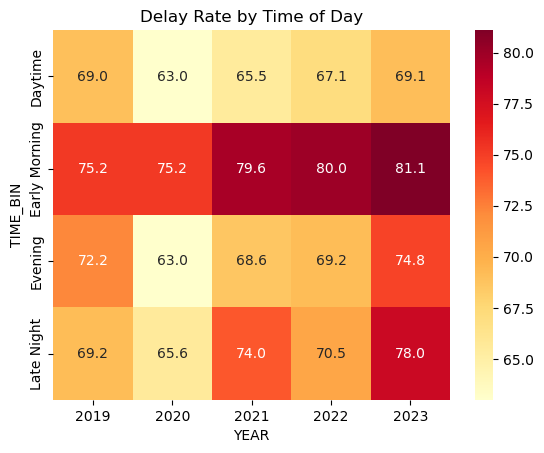

In [83]:
timebin_pivot = timebin_delay_flights.pivot(index="TIME_BIN", 
                                           columns="YEAR", 
                                           values="Delay_Rate")
sns.heatmap(timebin_pivot, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Delay Rate by Time of Day")
plt.show()

## 2.2 Hủy chuyến và chuyển hướng
### Nguyên nhân hủy chuyến (A–D) nào phổ biến nhất?

In [84]:
cancell_code_yearly = flights_cancelled.groupby(["YEAR", "CANCELLATION_CODE"])["FL_DATE"].count().reset_index(name = "Total_Flights")
cancell_code_yearly

,YEAR,CANCELLATION_CODE,Total_Flights
0,2019,A,2592
1,2019,B,4786
2,2019,C,1688
3,2019,D,1
4,2020,A,1327
5,2020,B,1427
6,2020,C,315
7,2020,D,16169
8,2021,A,2771
9,2021,B,3684


In [85]:
cancell_code = flights_cancelled.groupby("CANCELLATION_CODE")["FL_DATE"].count().reset_index(name = "Total_Flights")
cancell_code

,CANCELLATION_CODE,Total_Flights
0,A,12825
1,B,19022
2,C,4367
3,D,16308


### Tháng nào có nhiều chuyến bị hủy nhất?

In [86]:
flights_cancel_monthly = flights_cancelled.groupby("MONTH")["AIRLINE"].count().reset_index(name = "Total_Cancelled_Flights")
flights_cancel_monthly

,MONTH,Total_Cancelled_Flights
0,1,4699
1,2,4656
2,3,9931
3,4,11478
4,5,2784
5,6,3508
6,7,3524
7,8,3787
8,9,1886
9,10,1581


### Hãng nào có tỉ lệ diverted cao nhất?

In [87]:
divert_rate_airline_yearly = flights_diverted.groupby(["YEAR", "AIRLINE"])["FL_DATE"].count().reset_index(name = "Total_Diverted_Flights")

In [88]:
divert_rate_airline_top = (
    divert_rate_airline_yearly.groupby("YEAR", group_keys=False)
    .apply(lambda x: x.nlargest(1, "Total_Diverted_Flights"))
)
divert_rate_airline_top

,YEAR,AIRLINE,Total_Diverted_Flights
13,2019,SkyWest Airlines Inc.,201
29,2020,SkyWest Airlines Inc.,100
47,2021,Southwest Airlines Co.,165
64,2022,Southwest Airlines Co.,168
79,2023,Southwest Airlines Co.,147


### Có mối quan hệ giữa weather delay và cancellation code = B không?
- Chỉ filter ra B → không kiểm tra được mối quan hệ.
- Để kiểm tra quan hệ, bạn phải giữ cả 2 nhóm: có delay và không, bị hủy B và không.
- Dùng: prop.table() + chisq.test() là rõ nhất.

#### Cách 1: So sánh nhóm hủy B và nhóm không hủy B

In [89]:
df['is_cancelled_B'] = df['CANCELLATION_CODE'] == 'B'
df['has_weather_delay'] = df['DELAY_DUE_WEATHER'] > 0

# bảng so sánh tỉ lệ theo nhóm
pd.crosstab(df['has_weather_delay'], df['is_cancelled_B'], normalize='index')

is_cancelled_B,False,True
has_weather_delay,,
False,0.990388,0.009612
True,1.000000,0.000000


In [90]:
df['is_cancelled_B'].value_counts()

is_cancelled_B
False    1980978
True       19022
Name: count, dtype: int64

#### Cách 2: Chi-square test (quan hệ giữa 2 biến phân loại)

In [91]:
# Tạo bảng 2 chiều
from scipy.stats import chi2_contingency
import statsmodels.api as sm

table = pd.crosstab(df['has_weather_delay'], df['is_cancelled_B'])

# Test
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)

Chi-square: 202.82846486850804
p-value: 5.042183622152878e-46
